This notebook was created for the purpose of self-studying in Statistics and Business interpretation.


REF: 


[1] R for Marketing Research and Analytics (Use R!) 2015th Edition


[2] R - Multilevel Models Lecture (Updated): https://www.youtube.com/watch?v=UvyxSqEXBwc&t=2877s

[3] 正規分布に従う2次元データの作り方
http://rplus.wb-nahce.info/rsemi_stat_basic/r_nijigendata.html

## Hierarchical modeling (HLM) aka. Multilevel modeling
Generally when we use linear regression, we can estimate entire sample with one equation. we can call that "One for all" However, one for all is not be able to achieve nested data or hierachical data, a data with some sample belong to specific cluster.

Actually, there are an assumption before apply HLM algorithm.

What HLM can help us?
- missing value
- Independence # we can model the relationships between cases
- Homoscedascity can be ignored in a constrain


But our data should meet an asuumptions below.
- outliers
- multicolinearlity
- linearity
- homogeineity





In [2]:
# an example of 3 level Hierarchy

#    LEVEL-1     LEVEL-2     LEVEL-3

# 15 students ------|
#                class1 ------|   
#                            school A
#                class2 ------|
# 20 students ------| 


# 10 students ------|
#                class1 ------|   
#                            school B
#                class2 ------|
# 20 students ------| 


# 20 students ------|
#                class1 ------|   
#                            school C
#                class2 ------|
# 30 students ------| 

In [1]:
conjoint.df <- read.csv("http://goo.gl/G8knGV")

In [2]:
dim(conjoint.df)
head(conjoint.df)

[1] 3200    6

resp.id,rating,speed,height,const,theme
1,4,40,300,Steel,Dragon
1,3,50,200,Wood,Dragon
1,5,50,300,Wood,Dragon
1,6,60,300,Wood,Eagle
1,4,60,400,Wood,Eagle
1,4,50,400,Steel,Eagle


In [5]:
# Convert data to Category type

conjoint.df$speed <- factor(conjoint.df$speed)
conjoint.df$height <- factor(conjoint.df$height)
# df["speed"] = df["speed"].astype("category") - Python

In [6]:
head(conjoint.df)

resp.id,rating,speed,height,const,theme
1,4,40,300,Steel,Dragon
1,3,50,200,Wood,Dragon
1,5,50,300,Wood,Dragon
1,6,60,300,Wood,Eagle
1,4,60,400,Wood,Eagle
1,4,50,400,Steel,Eagle


In [7]:
summary(conjoint.df)

    resp.id           rating       speed     height       const     
 Min.   :  1.00   Min.   : 1.000   40: 800   200:1400   Steel:1400  
 1st Qu.: 50.75   1st Qu.: 3.000   50:1200   300:1200   Wood :1800  
 Median :100.50   Median : 5.000   60: 800   400: 600               
 Mean   :100.50   Mean   : 5.268   70: 400                          
 3rd Qu.:150.25   3rd Qu.: 7.000                                    
 Max.   :200.00   Max.   :10.000                                    
    theme     
 Dragon:1600  
 Eagle :1600  
              
              
              
              

In [8]:
set.seed(44)
resp.id <- 1:200 # respondent ids
nques <- 16 # number of conjoint ratings per respondent
speed <- sample(as.factor(c("40", "50", "60", "70")), size=nques, replace=TRUE)
height <- sample(as.factor(c("200", "300", "400")), size=nques, replace=TRUE)
const <- sample(as.factor(c("Wood", "Steel")), size= nques, replace=TRUE)
theme <- sample(as.factor(c("Dragon", "Eagle")), size=nques, replace=TRUE)


In [10]:
profiles.df <- data.frame(speed, height, const, theme)
profiles.model <- model.matrix(~ speed + height + const + theme, 
                               data=profiles.df)

In [39]:
install.packages("car")
library(car)

package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgDIO7l\downloaded_packages


Loading required package: carData
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


In [12]:
# like multiple one hot encoder
head(profiles.model)

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
1,0,0,0,1,0,0,1
1,0,1,0,1,0,1,1
1,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0
1,0,0,1,0,0,1,1


generate 2 dim data with mvrnorm package.

2次元データを生成する関数はmvrnorm関数です。

mvrnorm is the same method random number of normal distribution with rmorm function. The difference is 2 dimension (multivariate).

正規乱数を生成するrnorm関数と同じように 2次元正規乱数を生成することができます。

mvrnorm function use x and y variables ti specify mean and variance. mvrnorm関数は正規分布に従う2つの変数 x,y の平均値と分散共分散行列を入力して使います。

In [13]:
# draw a unique preference weight

#----------------------- Example ----------------------------
# library(MASS)　　　　　　　　　　　　　 # MASSパッケージの読込
# Mu <- c(20, 30)　　　　　　　　　　　　 # 平均値ベクタ
# Sig <- matrix(c(1, 2, 3, 4), ncol=2) 　# 分散共分散行列
# dat <- mvrnorm(5, Mu, Sig)　　　　　　 # データの生成
# ------------------------------------------------------------

# install.packages("MASS")
library(MASS)
mu = c(-3, 0.5, 1, 3, 2, 1, 0, -0.5)
sigma = diag(c(0.2, 0.1, 0.1, 0.1, 0.2, 0.3, 1, 1))
weight <- mvrnorm(length(resp.id), mu, sigma)

head(weight)


# library(MASS)     # a standard library in R
# weights <- mvrnorm(length(resp.id), 
#                    mu=c(-3, 0.5, 1, 3, 2, 1, 0, -0.5),
#                    Sigma=diag(c(0.2, 0.1, 0.1, 0.1, 0.2, 0.3, 1, 1)))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

-3.713408,0.9793009,0.9423120,2.888068,1.395761,0.7549029,-1.0566552,1.1918403
-2.713566,0.4172382,0.4180759,3.246932,2.227186,1.0977038,-0.2194549,-2.4560941
-2.444209,0.7217000,0.6178697,3.096627,2.005271,0.6465408,-0.6294841,-0.6445815
-2.408146,0.1857450,1.0120016,3.246196,1.817452,1.4886598,0.7193423,-0.4996718
-3.046289,0.6693013,1.2576259,2.737194,1.520247,0.9623886,0.3444106,-1.5388488
-3.269573,0.3994923,1.2164286,3.009205,2.079545,0.2153481,1.3327362,1.5820937


In [14]:
library(MASS)     # a standard library in R
weights <- mvrnorm(length(resp.id), 
                   mu=c(-3, 0.5, 1, 3, 2, 1, 0, -0.5),
                   Sigma=diag(c(0.2, 0.1, 0.1, 0.1, 0.2, 0.3, 1, 1)))

In [15]:
conjoint.df <- NULL
for (i in seq_along(resp.id)) {
  # create one respondent's ratings of the 16 items, plus error
  utility <- profiles.model %*% weights[i, ] + rnorm(nques)  # preference
  rating <- as.numeric(cut(utility, 10))   # put on a 10-point scale
  conjoint.resp <- cbind(resp.id=rep(i, nques), rating, profiles.df)
  # and add that respondent to the total data set
  conjoint.df <- rbind(conjoint.df, conjoint.resp)
} 

In [16]:
summary(conjoint.df)

    resp.id           rating       speed     height       const     
 Min.   :  1.00   Min.   : 1.000   40:1200   200:1800   Steel:1400  
 1st Qu.: 50.75   1st Qu.: 3.000   50: 600   300:1000   Wood :1800  
 Median :100.50   Median : 4.000   60: 800   400: 400               
 Mean   :100.50   Mean   : 4.749   70: 600                          
 3rd Qu.:150.25   3rd Qu.: 6.000                                    
 Max.   :200.00   Max.   :10.000                                    
    theme     
 Dragon:1000  
 Eagle :2200  
              
              
              
              

### Fixed effect (sample level estimation, overall estimation)

In [17]:
by(conjoint.df$rating, conjoint.df$height, mean)
by(conjoint.df$rating, conjoint.df$speed, mean)
by(conjoint.df$rating, conjoint.df$const, mean)
by(conjoint.df$rating, conjoint.df$theme, mean)

conjoint.df$height: 200
[1] 4.025
------------------------------------------------------------ 
conjoint.df$height: 300
[1] 6.471
------------------------------------------------------------ 
conjoint.df$height: 400
[1] 3.7

conjoint.df$speed: 40
[1] 3.765833
------------------------------------------------------------ 
conjoint.df$speed: 50
[1] 3.123333
------------------------------------------------------------ 
conjoint.df$speed: 60
[1] 5.17375
------------------------------------------------------------ 
conjoint.df$speed: 70
[1] 7.773333

conjoint.df$const: Steel
[1] 4.902143
------------------------------------------------------------ 
conjoint.df$const: Wood
[1] 4.629444

conjoint.df$theme: Dragon
[1] 5.582
------------------------------------------------------------ 
conjoint.df$theme: Eagle
[1] 4.37

Respondents prefer
- 300 feet height
- speed at 70 mph
- Steel material
- Dragon theme

In [18]:
ride.lm <- lm(rating ~ speed + height + const + theme, data=conjoint.df)
summary(ride.lm)


Call:
lm(formula = rating ~ speed + height + const + theme, data = conjoint.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3187 -1.3302  0.0419  1.1217  6.3982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.01264    0.10198  29.541  < 2e-16 ***
speed50      0.60066    0.10886   5.518 3.71e-08 ***
speed60      1.37211    0.09495  14.450  < 2e-16 ***
speed70      4.11990    0.10626  38.772  < 2e-16 ***
height300    2.66888    0.08314  32.099  < 2e-16 ***
height400    1.42232    0.13014  10.929  < 2e-16 ***
constWood   -0.01155    0.07528  -0.153    0.878    
themeEagle  -0.72340    0.08082  -8.951  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.861 on 3192 degrees of freedom
Multiple R-squared:  0.5196,	Adjusted R-squared:  0.5186 
F-statistic: 493.2 on 7 and 3192 DF,  p-value: < 2.2e-16


The coefficientd indicate the association with preference to rating
Respondents prefer
- 300 feet height
- speed at 70 mph
- Steel material due to wood is negative coeff
- Dragon theme due to negative value of Eagle theme 

----- FIXED EFFECT -----

overall rating of [ Estimate ] column 


3.01264(intercept) + 4.119(speed70) + 2.66(heigh300) + ... +,

-----------------------------------------------------------------------------------#

Since the survey is included both of agree and disagree opinion, this make a misunderstanding to our result. Additionally, let concerns coefficient of constWood, are they have strong different preferences ??? If they are truly indifferent. we should  select between steel and wood as a nbasics od cost. => Time to use Hierarchy modeling


### Random effect (individual level)

In [19]:
install.packages("lme4")

package 'lme4' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lme4'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\user\Anaconda3\envs\r-environment\Lib\R\library\00LOCK\lme4\libs\x64\lme4.dll to C:\Users\user\Anaconda3\envs\r-environment\Lib\R\library\lme4\libs\x64\lme4.dll: Permission denied"Warning message:
"restored 'lme4'"


The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpgDIO7l\downloaded_packages


In [20]:
# 0 = HLM with intercept only
# model with random intercept by respondent = (1 | resp.id)
# lmer: hierarchical estimation
# (1 | resp.id) stands for estimation นด a random effect of respondents to an intercept

library(lme4)
ride.hlm1 <- lmer(rating ~ speed + height + const + theme + (1 | resp.id), data = conjoint.df)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: Matrix


In [21]:
summary(ride.hlm1)

Linear mixed model fit by REML ['lmerMod']
Formula: rating ~ speed + height + const + theme + (1 | resp.id)
   Data: conjoint.df

REML criterion at convergence: 12941.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0141 -0.7132 -0.0026  0.6134  3.6704 

Random effects:
 Groups   Name        Variance Std.Dev.
 resp.id  (Intercept) 0.3509   0.5923  
 Residual             3.1148   1.7649  
Number of obs: 3200, groups:  resp.id, 200

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.01264    0.10537  28.590
speed50      0.60066    0.10321   5.820
speed60      1.37211    0.09003  15.241
speed70      4.11990    0.10075  40.893
height300    2.66888    0.07883  33.855
height400    1.42232    0.12339  11.527
constWood   -0.01155    0.07138  -0.162
themeEagle  -0.72340    0.07662  -9.441

Correlation of Fixed Effects:
           (Intr) sped50 sped60 sped70 hgh300 hgh400 cnstWd
speed50    -0.441                                          
speed60    -0.488  0.4

In [22]:
# fixed effect (overall respondent)
fixef(ride.hlm1) 

# random effect (individual respondent)
dim(ranef(ride.hlm1)$resp.id)
head(ranef(ride.hlm1)$resp.id)

(Intercept)     speed50     speed60     speed70   height300   height400 
 3.01263898  0.60066454  1.37211182  4.11990415  2.66887859  1.42231629 
  constWood  themeEagle 
-0.01155272 -0.72340256

[1] 200   1

(Intercept)
0.1213945997
-0.0393929496
-0.0393929496
1.0057261204
0.1615914870
0.0008039377


In [23]:
# coeff with mixed effect = Fixed effects(overall respondent) + Random effects(of each respondent)
#  Ex. for a second intercept, Coeff with mixed effect = 2.54 = 2.485 + 0.055
dim(coef(ride.hlm1)$resp.id)
head(coef(ride.hlm1)$resp.id)

[1] 200   8

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
3.134034,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026
2.973246,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026
2.973246,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026
4.018365,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026
3.174230,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026
3.013443,0.6006645,1.372112,4.119904,2.668879,1.422316,-0.01155272,-0.7234026


In [24]:
# Checking a effect of respondent to entire model 
# To increase an accuracy of our model (like parameter tunning in machine learning), 
  # we increase an interation of HML by specifying a number of iteration and shoosing a optimization method. 

ride.hlm2 <- lmer(rating ~ speed + height + const + theme + 
                  (speed + height + const + theme | resp.id), 
                  data = conjoint.df, 
                  control = lmerControl (optCtrl= list(maxfun =1000)))

boundary (singular) fit: see ?isSingular


In [25]:
# fixed effect (overall respondent)
fixef(ride.hlm2) 

# random effect (individual respondent)
dim(ranef(ride.hlm2)$resp.id)
head(ranef(ride.hlm2)$resp.id)

(Intercept)     speed50     speed60     speed70   height300   height400 
 3.01263898  0.60066454  1.37211182  4.11990415  2.66887859  1.42231629 
  constWood  themeEagle 
-0.01155272 -0.72340256

[1] 200   8

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
0.009762053,0.172936049,-0.03623401,-0.03585984,0.1119936,-0.2846821,-0.5601664,0.51305859
0.916336893,0.002559828,-0.22559244,-0.62384951,-0.1097555,-1.1809815,-0.3195201,-0.77098335
-0.894565754,-0.099757682,-0.03277686,0.19239842,0.3729035,-0.6355823,1.6125366,-0.05855913
0.478810155,-0.624934104,0.32824634,-0.09911779,-0.2040735,0.4189849,0.9781787,0.47087261
-0.831253391,0.216689744,0.14600538,0.50047707,0.2674702,0.2939336,-0.4797870,1.43492925
1.005896273,0.438508795,0.05434604,-0.02059809,-0.5060188,1.1477632,-2.9378605,0.59667503


In [26]:
# coeff with mixed effect = Fixed effects(overall respondent) + Random effects(of individual respondent)
head(coef(ride.hlm2)$resp.id)

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
3.022401,0.77360059,1.335878,4.084044,2.780872,1.1376342,-0.5717191,-0.2103440
3.928976,0.60322437,1.146519,3.496055,2.559123,0.2413348,-0.3310728,-1.4943859
2.118073,0.50090685,1.339335,4.312303,3.041782,0.7867340,1.6009838,-0.7819617
3.491449,-0.02426957,1.700358,4.020786,2.464805,1.8413012,0.9666260,-0.2525299
2.181386,0.81735428,1.518117,4.620381,2.936349,1.7162499,-0.4913397,0.7115267
4.018535,1.03917333,1.426458,4.099306,2.162860,2.5700795,-2.9494132,-0.1267275


In [27]:
# Preference of respondent 6
respondent_6 <- 6
coef(ride.hlm2)$resp.id[respondent_6, ]

,(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
6,4.018535,1.039173,1.426458,4.099306,2.16286,2.57008,-2.949413,-0.1267275


Business interpretation: As indicated above, respondent 6 prefers 
- speed at 70mph
- steel construction material (-2.9 for wood means he/she strongly dislikes a wood construction material)
- Dragon theme (-0.126 for eagle theme) 



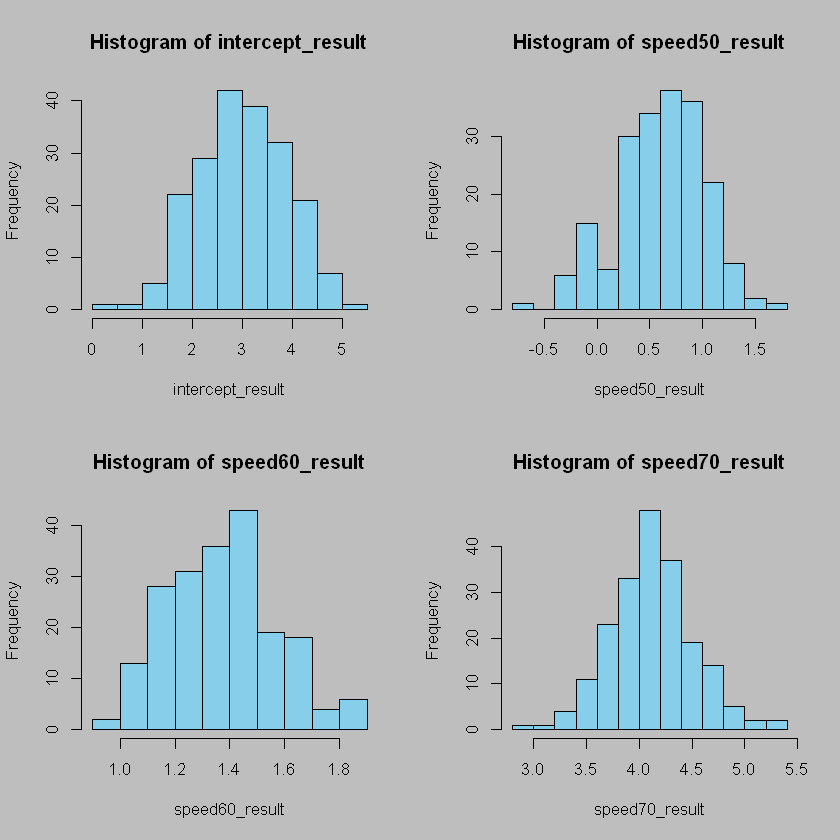

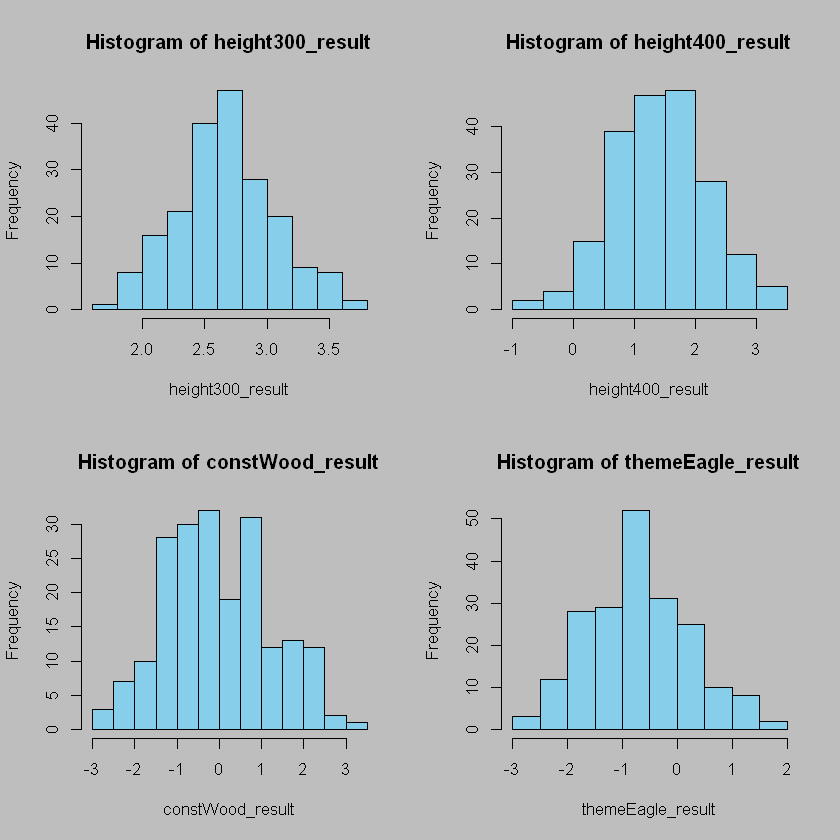

In [28]:
# Let's see the difference across respondents

intercept_result <- coef(ride.hlm2) $resp.id[,1]
speed50_result <- coef(ride.hlm2) $resp.id $speed50
speed60_result <- coef(ride.hlm2) $resp.id $speed60
speed70_result <- coef(ride.hlm2) $resp.id $speed70
height300_result <- coef(ride.hlm2) $resp.id $height300
height400_result <- coef(ride.hlm2) $resp.id $height400
constWood_result <- coef(ride.hlm2) $resp.id $constWood
themeEagle_result <- coef(ride.hlm2) $resp.id $themeEagle

par(mfrow=c(2,2))
par(bg="gray") 

hist(intercept_result, breaks = 10, col="skyblue")
hist(speed50_result, breaks = 10, col="skyblue")

hist(speed60_result, breaks = 10, col="skyblue")
hist(speed70_result, breaks = 10, col="skyblue")

hist(height300_result, breaks = 10, col="skyblue")
hist(height400_result, breaks = 10, col="skyblue")

hist(constWood_result, breaks = 10, col="skyblue")
hist(themeEagle_result, breaks = 10, col="skyblue")

In conclusion, we have created the individual level modeling to investigate a customer's preference. According to the result, we can use theme to map and group an customer to discover more relationship such as in case of we have respondent information, respondent 1 and 2 are strongly prefer speed 70, high 300 and dislike wood. 

We can try to discover
- Are they the same generation ?
- What is the their gender?
- foreign or domestic

We should add the respondent information section in our survey to map them to ID and discover what is their preference.
